In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

## Gather data

In [2]:
iris = datasets.load_iris()

In [3]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
target = iris.target
df['target']=target

In [6]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
df.shape

(150, 5)

In [8]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [9]:
mapper = {0:'setosa',1:'versicolor', 2:'virginica'}
df['target'] = df['target'].map(mapper)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Prepare the data for ML

In [10]:
X = df.drop('target', axis=1)

In [11]:
y= df['target']

In [12]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [13]:
from sklearn.preprocessing import LabelBinarizer

In [14]:
encoder = LabelBinarizer()

In [15]:
y= encoder.fit_transform(y)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [20]:
scaler.fit(X_train)

MinMaxScaler()

In [21]:
scaled_X_train = scaler.transform(X_train)

In [22]:
scaled_X_test = scaler.transform(X_test)

## Build the model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [24]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape = [4,]))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', metrics=['accuracy'])
          


In [25]:
from tensorflow.keras.callbacks import EarlyStopping

In [26]:
early_stop = EarlyStopping(patience=10)

In [27]:
model.fit(x=scaled_X_train, y=y_train, epochs=500,
          validation_data=(scaled_X_test, y_test), verbose=1 ,callbacks=[early_stop]         )

Epoch 1/500
4/4 [==============================] - 0s 102ms/step - loss: 1.1352 - accuracy: 0.3500 - val_loss: 1.1146 - val_accuracy: 0.4000
Epoch 2/500
4/4 [==============================] - 0s 8ms/step - loss: 1.1309 - accuracy: 0.3500 - val_loss: 1.1112 - val_accuracy: 0.4000
Epoch 3/500
4/4 [==============================] - 0s 8ms/step - loss: 1.1270 - accuracy: 0.3500 - val_loss: 1.1078 - val_accuracy: 0.4000
Epoch 4/500
4/4 [==============================] - 0s 8ms/step - loss: 1.1231 - accuracy: 0.3500 - val_loss: 1.1045 - val_accuracy: 0.4000
Epoch 5/500
4/4 [==============================] - 0s 8ms/step - loss: 1.1193 - accuracy: 0.3500 - val_loss: 1.1013 - val_accuracy: 0.4000
Epoch 6/500
4/4 [==============================] - 0s 8ms/step - loss: 1.1154 - accuracy: 0.3500 - val_loss: 1.0980 - val_accuracy: 0.4333
Epoch 7/500
4/4 [==============================] - 0s 10ms/step - loss: 1.1117 - accuracy: 0.3667 - val_loss: 1.0948 - val_accuracy: 0.4333
Epoch 8/500
4/4 [=======

4/4 [==============================] - 0s 12ms/step - loss: 0.9516 - accuracy: 0.6583 - val_loss: 0.9500 - val_accuracy: 0.6333
Epoch 60/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9479 - accuracy: 0.6833 - val_loss: 0.9464 - val_accuracy: 0.6333
Epoch 61/500
4/4 [==============================] - 0s 11ms/step - loss: 0.9442 - accuracy: 0.6667 - val_loss: 0.9427 - val_accuracy: 0.6333
Epoch 62/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9402 - accuracy: 0.6750 - val_loss: 0.9391 - val_accuracy: 0.6333
Epoch 63/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9363 - accuracy: 0.6750 - val_loss: 0.9355 - val_accuracy: 0.6333
Epoch 64/500
4/4 [==============================] - 0s 10ms/step - loss: 0.9323 - accuracy: 0.6750 - val_loss: 0.9315 - val_accuracy: 0.6333
Epoch 65/500
4/4 [==============================] - 0s 9ms/step - loss: 0.9283 - accuracy: 0.6750 - val_loss: 0.9277 - val_accuracy: 0.6333
Epoch 66/500
4/4 [==========

4/4 [==============================] - 0s 10ms/step - loss: 0.6731 - accuracy: 0.6833 - val_loss: 0.7090 - val_accuracy: 0.7000
Epoch 118/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6697 - accuracy: 0.6833 - val_loss: 0.7060 - val_accuracy: 0.7333
Epoch 119/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6661 - accuracy: 0.6833 - val_loss: 0.7028 - val_accuracy: 0.7333
Epoch 120/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6627 - accuracy: 0.6833 - val_loss: 0.6998 - val_accuracy: 0.7333
Epoch 121/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6592 - accuracy: 0.6833 - val_loss: 0.6968 - val_accuracy: 0.7333
Epoch 122/500
4/4 [==============================] - 0s 10ms/step - loss: 0.6559 - accuracy: 0.6917 - val_loss: 0.6939 - val_accuracy: 0.7333
Epoch 123/500
4/4 [==============================] - 0s 11ms/step - loss: 0.6526 - accuracy: 0.6917 - val_loss: 0.6910 - val_accuracy: 0.7333
Epoch 124/500
4/4 [=

Epoch 175/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5325 - accuracy: 0.7000 - val_loss: 0.5836 - val_accuracy: 0.6333
Epoch 176/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5308 - accuracy: 0.7000 - val_loss: 0.5822 - val_accuracy: 0.6333
Epoch 177/500
4/4 [==============================] - 0s 11ms/step - loss: 0.5293 - accuracy: 0.7000 - val_loss: 0.5808 - val_accuracy: 0.6333
Epoch 178/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5278 - accuracy: 0.7000 - val_loss: 0.5794 - val_accuracy: 0.6333
Epoch 179/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5262 - accuracy: 0.7000 - val_loss: 0.5778 - val_accuracy: 0.6333
Epoch 180/500
4/4 [==============================] - 0s 10ms/step - loss: 0.5247 - accuracy: 0.7000 - val_loss: 0.5761 - val_accuracy: 0.6333
Epoch 181/500
4/4 [==============================] - 0s 9ms/step - loss: 0.5232 - accuracy: 0.7000 - val_loss: 0.5746 - val_accuracy: 0.6333
Epoch 1

Epoch 233/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4616 - accuracy: 0.7583 - val_loss: 0.5094 - val_accuracy: 0.7667
Epoch 234/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4607 - accuracy: 0.7583 - val_loss: 0.5080 - val_accuracy: 0.8000
Epoch 235/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4596 - accuracy: 0.7583 - val_loss: 0.5070 - val_accuracy: 0.8000
Epoch 236/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4587 - accuracy: 0.7583 - val_loss: 0.5057 - val_accuracy: 0.8000
Epoch 237/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4576 - accuracy: 0.7583 - val_loss: 0.5046 - val_accuracy: 0.8000
Epoch 238/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4567 - accuracy: 0.7667 - val_loss: 0.5035 - val_accuracy: 0.8000
Epoch 239/500
4/4 [==============================] - 0s 9ms/step - loss: 0.4558 - accuracy: 0.7667 - val_loss: 0.5022 - val_accuracy: 0.8000
Epoch 24

Epoch 291/500
4/4 [==============================] - 0s 8ms/step - loss: 0.4061 - accuracy: 0.8583 - val_loss: 0.4473 - val_accuracy: 0.8667
Epoch 292/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4051 - accuracy: 0.8583 - val_loss: 0.4463 - val_accuracy: 0.8667
Epoch 293/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4042 - accuracy: 0.8583 - val_loss: 0.4451 - val_accuracy: 0.9000
Epoch 294/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4032 - accuracy: 0.8583 - val_loss: 0.4440 - val_accuracy: 0.9000
Epoch 295/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4023 - accuracy: 0.8583 - val_loss: 0.4429 - val_accuracy: 0.9000
Epoch 296/500
4/4 [==============================] - 0s 11ms/step - loss: 0.4014 - accuracy: 0.8667 - val_loss: 0.4420 - val_accuracy: 0.9000
Epoch 297/500
4/4 [==============================] - 0s 10ms/step - loss: 0.4005 - accuracy: 0.8667 - val_loss: 0.4411 - val_accuracy: 0.9000
Epoch 2

Epoch 349/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3543 - accuracy: 0.9167 - val_loss: 0.3900 - val_accuracy: 0.9667
Epoch 350/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3535 - accuracy: 0.9167 - val_loss: 0.3887 - val_accuracy: 0.9667
Epoch 351/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3525 - accuracy: 0.9167 - val_loss: 0.3881 - val_accuracy: 0.9667
Epoch 352/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3516 - accuracy: 0.9167 - val_loss: 0.3873 - val_accuracy: 0.9667
Epoch 353/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3509 - accuracy: 0.9167 - val_loss: 0.3862 - val_accuracy: 0.9667
Epoch 354/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3499 - accuracy: 0.9167 - val_loss: 0.3856 - val_accuracy: 0.9667
Epoch 355/500
4/4 [==============================] - 0s 9ms/step - loss: 0.3491 - accuracy: 0.9250 - val_loss: 0.3848 - val_accuracy: 0.9667
Epoch 356/50

4/4 [==============================] - 0s 8ms/step - loss: 0.3072 - accuracy: 0.9333 - val_loss: 0.3394 - val_accuracy: 0.9667
Epoch 407/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3063 - accuracy: 0.9417 - val_loss: 0.3384 - val_accuracy: 0.9667
Epoch 408/500
4/4 [==============================] - 0s 8ms/step - loss: 0.3055 - accuracy: 0.9500 - val_loss: 0.3374 - val_accuracy: 0.9667
Epoch 409/500
4/4 [==============================] - 0s 7ms/step - loss: 0.3047 - accuracy: 0.9417 - val_loss: 0.3367 - val_accuracy: 0.9667
Epoch 410/500
4/4 [==============================] - 0s 12ms/step - loss: 0.3040 - accuracy: 0.9500 - val_loss: 0.3357 - val_accuracy: 0.9667
Epoch 411/500
4/4 [==============================] - 0s 10ms/step - loss: 0.3032 - accuracy: 0.9583 - val_loss: 0.3350 - val_accuracy: 0.9667
Epoch 412/500
4/4 [==============================] - 0s 11ms/step - loss: 0.3023 - accuracy: 0.9583 - val_loss: 0.3341 - val_accuracy: 0.9667
Epoch 413/500
4/4 [=====

Epoch 464/500
4/4 [==============================] - 0s 7ms/step - loss: 0.2644 - accuracy: 0.9750 - val_loss: 0.2935 - val_accuracy: 0.9667
Epoch 465/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2636 - accuracy: 0.9750 - val_loss: 0.2928 - val_accuracy: 0.9667
Epoch 466/500
4/4 [==============================] - 0s 8ms/step - loss: 0.2631 - accuracy: 0.9750 - val_loss: 0.2920 - val_accuracy: 0.9667
Epoch 467/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2624 - accuracy: 0.9750 - val_loss: 0.2912 - val_accuracy: 0.9667
Epoch 468/500
4/4 [==============================] - 0s 12ms/step - loss: 0.2617 - accuracy: 0.9750 - val_loss: 0.2906 - val_accuracy: 0.9667
Epoch 469/500
4/4 [==============================] - 0s 9ms/step - loss: 0.2610 - accuracy: 0.9750 - val_loss: 0.2899 - val_accuracy: 0.9667
Epoch 470/500
4/4 [==============================] - 0s 11ms/step - loss: 0.2605 - accuracy: 0.9750 - val_loss: 0.2890 - val_accuracy: 0.9667
Epoch 471/

## Evaluation the model

In [28]:
metrics = pd.DataFrame(model.history.history)
metrics

,loss,accuracy,val_loss,val_accuracy
0,1.135201,0.350,1.114628,0.400000
1,1.130933,0.350,1.111213,0.400000
2,1.126972,0.350,1.107841,0.400000
3,1.123072,0.350,1.104457,0.400000
4,1.119306,0.350,1.101289,0.400000
...,...,...,...,...
495,0.243799,0.975,0.271679,0.966667
496,0.243160,0.975,0.271139,0.966667
497,0.242622,0.975,0.270434,0.966667
498,0.241947,0.975,0.269848,0.966667


<AxesSubplot:>

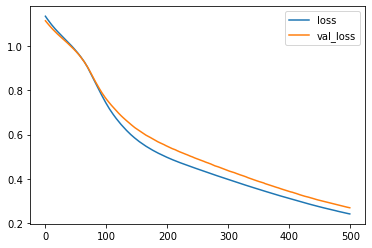

In [29]:
metrics[['loss','val_loss']].plot()

<AxesSubplot:>

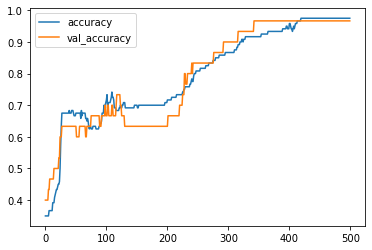

In [30]:
metrics[['accuracy','val_accuracy']].plot()

In [31]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.26938897371292114, 0.9666666388511658]

## Retrain the model with all data

In [32]:
epochs = len(metrics)

In [33]:
scaled_X = scaler.fit_transform(X)

In [34]:
model = Sequential()
model.add(Dense(units=4,activation='relu'))

model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

In [35]:
model.fit(scaled_X,y,epochs=epochs)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 1.5658 - accuracy: 0.0067
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 1.5440 - accuracy: 0.0000e+00
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 1.5232 - accuracy: 0.0000e+00
Epoch 4/500
5/5 [==============================] - 0s 2ms/step - loss: 1.5031 - accuracy: 0.0000e+00
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 1.4834 - accuracy: 0.0000e+00
Epoch 6/500
5/5 [==============================] - 0s 2ms/step - loss: 1.4659 - accuracy: 0.0000e+00
Epoch 7/500
5/5 [==============================] - 0s 2ms/step - loss: 1.4480 - accuracy: 0.0000e+00
Epoch 8/500
5/5 [==============================] - 0s 2ms/step - loss: 1.4305 - accuracy: 0.0000e+00
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 1.4139 - accuracy: 0.0000e+00
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 1.3984 - accuracy: 0.00

5/5 [==============================] - 0s 2ms/step - loss: 0.9199 - accuracy: 0.7667
Epoch 84/500
5/5 [==============================] - 0s 1ms/step - loss: 0.9167 - accuracy: 0.7600
Epoch 85/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9133 - accuracy: 0.7600
Epoch 86/500
5/5 [==============================] - 0s 1ms/step - loss: 0.9102 - accuracy: 0.7533
Epoch 87/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9068 - accuracy: 0.7467
Epoch 88/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9036 - accuracy: 0.7467
Epoch 89/500
5/5 [==============================] - 0s 2ms/step - loss: 0.9003 - accuracy: 0.7467
Epoch 90/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8972 - accuracy: 0.7400
Epoch 91/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8941 - accuracy: 0.7400
Epoch 92/500
5/5 [==============================] - 0s 2ms/step - loss: 0.8910 - accuracy: 0.7400
Epoch 93/500
5/5 [===============

5/5 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.8200
Epoch 166/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7060 - accuracy: 0.8267
Epoch 167/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7041 - accuracy: 0.8267
Epoch 168/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7023 - accuracy: 0.8267
Epoch 169/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7004 - accuracy: 0.8267
Epoch 170/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6986 - accuracy: 0.8267
Epoch 171/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6967 - accuracy: 0.8333
Epoch 172/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.8333
Epoch 173/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6931 - accuracy: 0.8333
Epoch 174/500
5/5 [==============================] - 0s 2ms/step - loss: 0.6913 - accuracy: 0.8400
Epoch 175/500
5/5 [=====

5/5 [==============================] - 0s 1ms/step - loss: 0.5904 - accuracy: 0.9067
Epoch 248/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5893 - accuracy: 0.9067
Epoch 249/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5883 - accuracy: 0.9133
Epoch 250/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5872 - accuracy: 0.9133
Epoch 251/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5861 - accuracy: 0.9200
Epoch 252/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5851 - accuracy: 0.9200
Epoch 253/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5840 - accuracy: 0.9200
Epoch 254/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5830 - accuracy: 0.9200
Epoch 255/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5820 - accuracy: 0.9200
Epoch 256/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5809 - accuracy: 0.9200
Epoch 257/500
5/5 [=====

5/5 [==============================] - 0s 999us/step - loss: 0.5157 - accuracy: 0.9400
Epoch 330/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5149 - accuracy: 0.9400
Epoch 331/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5141 - accuracy: 0.9400
Epoch 332/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5133 - accuracy: 0.9400
Epoch 333/500
5/5 [==============================] - 0s 2ms/step - loss: 0.5125 - accuracy: 0.9400
Epoch 334/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5117 - accuracy: 0.9400
Epoch 335/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5109 - accuracy: 0.9400
Epoch 336/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5102 - accuracy: 0.9400
Epoch 337/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5093 - accuracy: 0.9400
Epoch 338/500
5/5 [==============================] - 0s 1ms/step - loss: 0.5085 - accuracy: 0.9400
Epoch 339/500
5/5 [===

Epoch 411/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4394 - accuracy: 0.9467
Epoch 412/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4383 - accuracy: 0.9467
Epoch 413/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4370 - accuracy: 0.9467
Epoch 414/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4358 - accuracy: 0.9467
Epoch 415/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.9467
Epoch 416/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4335 - accuracy: 0.9467
Epoch 417/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4323 - accuracy: 0.9467
Epoch 418/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4311 - accuracy: 0.9467
Epoch 419/500
5/5 [==============================] - 0s 1ms/step - loss: 0.4299 - accuracy: 0.9467
Epoch 420/500
5/5 [==============================] - 0s 2ms/step - loss: 0.4287 - accuracy: 0.9533
Epoch 421/

5/5 [==============================] - 0s 2ms/step - loss: 0.3422 - accuracy: 0.9667
Epoch 494/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3412 - accuracy: 0.9667
Epoch 495/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3400 - accuracy: 0.9667
Epoch 496/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.9667
Epoch 497/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3378 - accuracy: 0.9667
Epoch 498/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3367 - accuracy: 0.9667
Epoch 499/500
5/5 [==============================] - 0s 1ms/step - loss: 0.3356 - accuracy: 0.9667
Epoch 500/500
5/5 [==============================] - 0s 2ms/step - loss: 0.3348 - accuracy: 0.9667


## Save the model and the scaler

In [36]:
model.save("final_iris_model.h5")

In [37]:
import joblib
joblib.dump(scaler,'iris_scaler.pkl')

['iris_scaler.pkl']

## Test and predict

In [38]:
from tensorflow.keras.models import load_model

In [39]:
iris_model = load_model("final_iris_model.h5")
iris_scaler = joblib.load("iris_scaler.pkl")

In [40]:
flower_example = {'sepal_length':5.1,
                 'sepal_width':3.5,
                 'petal_length':1.4,
                 'petal_width':0.2}

In [41]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [42]:
def prediction(model,scaler,sample_json):
    
       
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_index = np.argmax(model.predict(flower), axis=-1)[0]
    
    return classes[class_index]

In [43]:
prediction(iris_model,iris_scaler,flower_example)

'setosa'

## Code to be used in text editor

In [44]:
from tensorflow.keras.models import load_model
import joblib

iris_model = load_model("final_iris_model.h5")
iris_scaler = joblib.load("iris_scaler.pkl")

def prediction(model,scaler,sample_json):
    
       
    s_len = sample_json['sepal_length']
    s_wid = sample_json['sepal_width']
    p_len = sample_json['petal_length']
    p_wid = sample_json['petal_width']
    
    flower = [[s_len,s_wid,p_len,p_wid]]
    
    flower = scaler.transform(flower)
    
    classes = np.array(['setosa', 'versicolor', 'virginica'])
    
    class_index = np.argmax(model.predict(flower), axis=-1)[0]
    
    return classes[class_index]